## Exercise 1: Unsupervised Models (20 points)

Question 1. Import the required libraries for a kmeans model. Import make_blobs from
the sklearn.datasets.samples_generator.

In [0]:
#reference: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

Question 2. Define X,y as n_samples=300, centers=4, cluster_std=0.6, and
random_state=0.

In [0]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

Question 3. Use a scatter plot to show the clusters.

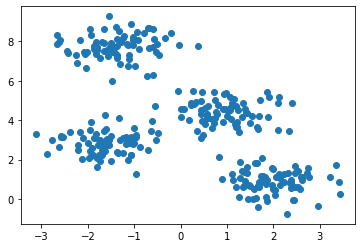

In [3]:
plt.scatter(X[:,0], X[:,1])

Question 4. Define ‘within cluster sum of squares’ as wcss[ ].

The purpose of this question is to determine the ‘elbow’ value.

Define wcss ‘for i in range(1, 11)’ with ‘kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,
random_state=0).’

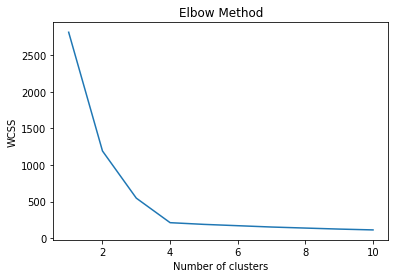

In [4]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Question 5. What is the ‘elbow’ value? What does it mean?

Reference: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/


'elbow' value is at k = 4

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.

Question 6. Now that you have determined the number of clusters, add the
‘cluster_centers_’ for each cluster in a plot.

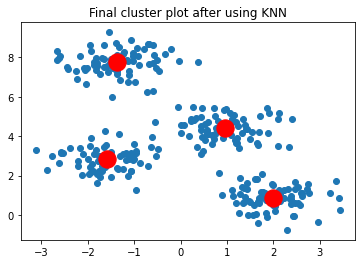

In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Final cluster plot after using KNN')
plt.show()

Question 7. What are the other methods of clustering? Provide at least two examples and determine their benefits and limitations.

Other types of clutering are K Nearest Neighbor (KNN) and Density Based Spatial Clustering (DBSCAN).

KNN is a non parametric algorithm. K refers to 'n_neighbors' in the KNN function. It does not make any underlying assumptions about the distribution of data. KNN algorithm can also be used for regression problems. Regression problems will be using averages of nearest neighbors rather than voting from nearest neighbors.

Applications:  economic forecasting, data compression, and genetics

Benefits: 
 - No assumptions about data
 - Simple algorithm to explain and understand/interpret
 - Overall good accuracy
 - Versatile useful for classification or regression

Limitations:
 - Computationally expensive because the algorithm stores all the training data
 - High memory requirement
 - Prediction stage might be slow with large datasets
 - May be sensitive to features not relevant in the classification and to the scale of the data


DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by region of low density. It also marks as outliers the points that are in low density regions.

Applications: Characters recognition, Management systems

Benifits:
 - It requires minimum domain knowledge
 - It can discover clusters of arbitrary shape
 - It works well with large samples of data

Limitations:
 - Does not work well while dealing with clusters of varying densities.
 - Less efficient results with high dimensional data

Question 8. How are unsupervised models different from supervised models?

Reference: https://www.guru99.com/supervised-vs-unsupervised-learning.html

In unsupervised learning model,
 - only input data will be given
 - Algorithms are used against data which is not labeled
 - Unsupervised algorithms can be divided into different categories: like Cluster algorithms, K-means, Hierarchical clustering, etc.
 - Unsupervised learning is computationally complex
 - Unsupervised learning does not use output data
 - Less accurate and trustworthy method
 - Learning method takes place in real time
 - Number of classes is not known
 - You cannot get precise information regarding data sorting, and the output as data used in unsupervised learning is labeled and not known

In a supervised learning model,
 - input and output variables will be given
 - Algorithms are trained using labeled data
 - Support vector machine, Neural network, Linear and logistics regression, random forest, and Classification trees
 - Supervised learning is a simpler method
 - Supervised learning model uses training data to learn a link between the input and the outputs
 - Highly accurate and trustworthy method
 - Learning method takes place offline
 - Number of classes is known
 - Classifying big data can be a real challenge in Supervised Learning

==========================================================================

## Exercise 2: Neural Network (40 points)
Question 1. Plot the histograms of the variables.

Visualize the difference in distribution between diabetics and non-diabetics with separate plots using seaborn.

Create a subplot of 3 X 3 and plot a density plot for each variable.

Use the diabetes2.csv file from the Data Files folder.

Hide the 9th subplot.

In [0]:
#reference: Neural Network Projects with Python: The ultimate guide to using Python By James Loy

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

In [0]:
df = pd.read_csv('diabetes2.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdd274cf98>,
      dtype=object)

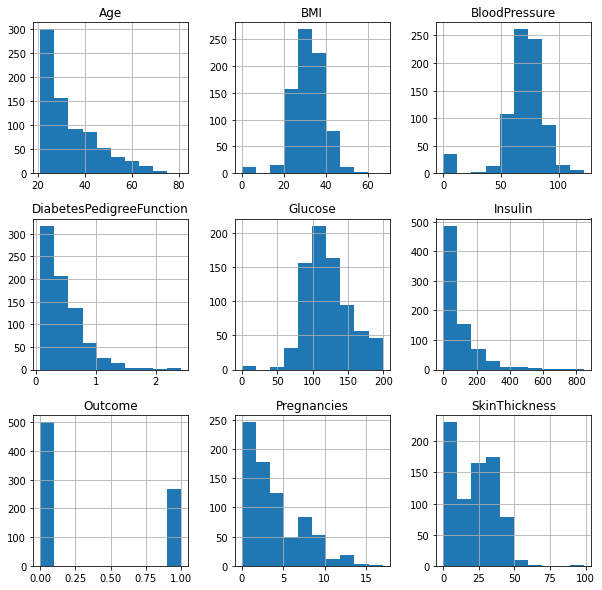

In [9]:
df.hist(figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdd230c080>,
      dtype=object)

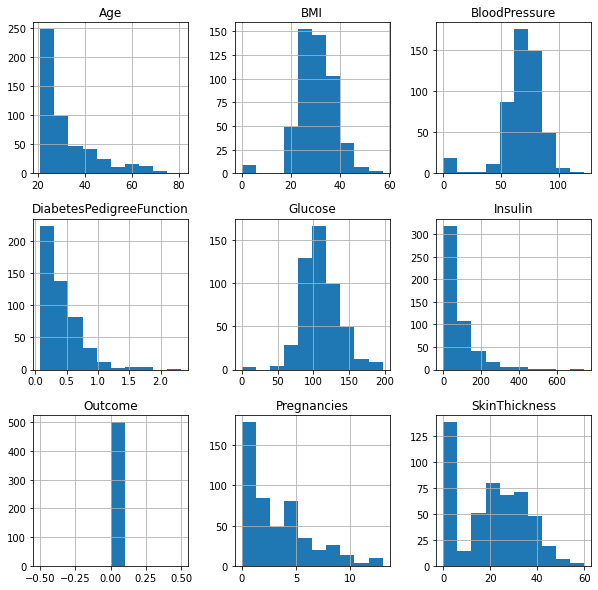

In [10]:
diabetes_outcome_0 = df[df['Outcome']==0]
diabetes_outcome_0.hist(figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdd393f668>,
      dtype=object)

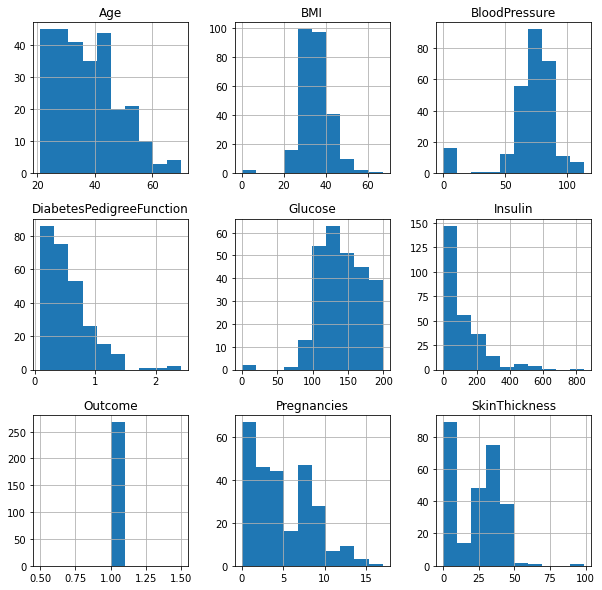

In [11]:
diabetes_outcome_1 = df[df['Outcome']==1]
diabetes_outcome_1.hist(figsize=(10, 10))

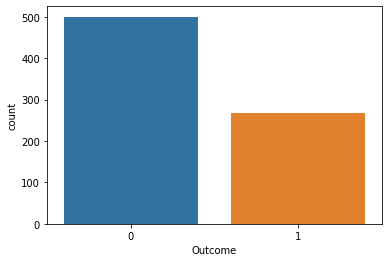

In [12]:
sns.countplot(x = 'Outcome',data = df)

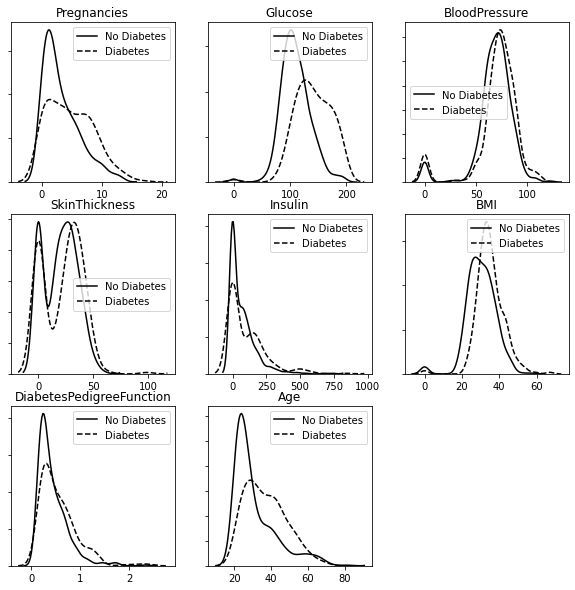

In [13]:
plt.subplots(3,3,figsize=(10,10))

for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':'No Diabetes'})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':'Diabetes'})
    ax.set_title(col)

plt.subplot(3,3,9).set_visible(False)

plt.show()

Question 2. Check the data (null data and number of rows with 0 for each variable).

Replace the zero values with NaN. Re-check the data.

Replace the NaN values with the mean of the non-missing values.

In [14]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
print('Number of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


Not editing the 'Pregnancies' column as having a 0 value is valid.

In [0]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
print('Number of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [0]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 3. Standardize the data. Take a look at the mean, std. deviation, and the maximum of each of the transformed variables.

In [0]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

In [0]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [0]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [25]:
df.describe().loc[['mean','std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


Question 4. Create a train and test set (80/20).

In [0]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Question 5. Use the sequential class from Keras to build the MLP.

Add two hidden layers (with the respective node values of 32 and 16, ‘relu’ activation) and one hidden layer (‘sigmoid’ activation for output layer).

Use ‘adam’ optimizer and ‘binary crossentropy’ loss.

What does cross-entropy mean and refer to?

In [28]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


In [0]:
from keras.layers import Dense
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Reference: https://machinelearningmastery.com/cross-entropy-for-machine-learning/

Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.

Question 6. What is the outcome of 100 and 200 epochs? Any difference? Explain.

In [30]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
614/614 [==============================] - 0s 329us/step - loss: 0.6005 - accuracy: 0.7150
Epoch 2/100
614/614 [==============================] - 0s 49us/step - loss: 0.5550 - accuracy: 0.7427
Epoch 3/100
614/614 [==============================] - 0s 51us/step - loss: 0.5275 - accuracy: 0.7573
Epoch 4/100
614/614 [==============================] - 0s 51us/step - loss: 0.5088 - accuracy: 0.7590
Epoch 5/100
614/614 [==============================] - 0s 48us/step - loss: 0.4945 - accuracy: 0.7720
Epoch 6/100
614/614 [==============================] - 0s 45us/step - loss: 0.4852 - accuracy: 0.7752
Epoch 7/100
614/614 [==============================] - 0s 48us/step - loss: 0.4787 - accuracy: 0.7801
Epoch 8/100
614/614 [==============================] - 0s 47us/step - loss: 0.4740 - accuracy: 0.7720
Epoch 9/100
614/614 [==============================] - 0s 46us/step - loss: 0.4686 - accuracy: 0.7752
Epoch 10/100
614/614 [==============================] - 0s 45us/step - loss: 0.46

In [31]:
scores = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

614/614 [==============================] - 0s 60us/step
Training Accuracy: 84.36%

154/154 [==============================] - 0s 40us/step
Testing Accuracy: 80.52%



In [32]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
614/614 [==============================] - 0s 53us/step - loss: 0.3553 - accuracy: 0.8388
Epoch 2/200
614/614 [==============================] - 0s 47us/step - loss: 0.3544 - accuracy: 0.8306
Epoch 3/200
614/614 [==============================] - 0s 46us/step - loss: 0.3521 - accuracy: 0.8371
Epoch 4/200
614/614 [==============================] - 0s 48us/step - loss: 0.3527 - accuracy: 0.8404
Epoch 5/200
614/614 [==============================] - 0s 63us/step - loss: 0.3514 - accuracy: 0.8371
Epoch 6/200
614/614 [==============================] - 0s 47us/step - loss: 0.3493 - accuracy: 0.8420
Epoch 7/200
614/614 [==============================] - 0s 45us/step - loss: 0.3504 - accuracy: 0.8355
Epoch 8/200
614/614 [==============================] - 0s 50us/step - loss: 0.3487 - accuracy: 0.8388
Epoch 9/200
614/614 [==============================] - 0s 50us/step - loss: 0.3456 - accuracy: 0.8485
Epoch 10/200
614/614 [==============================] - 0s 49us/step - loss: 0.345

In [33]:
scores = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

614/614 [==============================] - 0s 28us/step
Training Accuracy: 94.14%

154/154 [==============================] - 0s 33us/step
Testing Accuracy: 78.57%



The loss decreases and the accuracy increases over each epoch, as the learning algorithm continuously updates the weights and biases in the MLP according to the training data.

Question 7. Evaluate the training and testing sets’ accuracy.

In [34]:
loss, acc = model.evaluate(X_train,y_train, verbose=0)
print('Train Accuracy: %.2f%%\n' % (acc*100))

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.2f%%\n' % (acc*100))

Train Accuracy: 94.14%

Test Accuracy: 78.57%



The models which are trained more, have more training accuracy and testing accuracy. For the model which is trained with 100 epochs, it has a training accuracy of almost 84.36 percent and testing accuracy of 80.52 percent.

Where as, for the model which is trained with 200 epochs, it has a training accuracy of almsot 94.14 percent and testing accuracy of 78.57 percent. If we see the testing accuracies of both models, the number of epochs doesn't seem to be matter as they are almost same.

It also shows that the model is overfitting.

Question 8. Provide the confusion matrix using seaborn. What are your conclusions?

Text(33.0, 0.5, 'Actual')

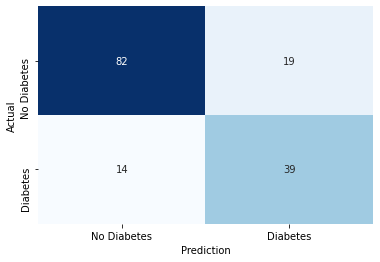

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, 
                 xticklabels=['No Diabetes','Diabetes'],
                 yticklabels=['No Diabetes','Diabetes'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

From, the confusion matrix, you can say that most of the predictions were true (82 + 39 = 121). It has predicted almost 121 true with only 14 + 19 = 33 false.

Question 9. Provide the ROC graph. What is the area under the curve? What are your conclusions?

In [0]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)

In [0]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

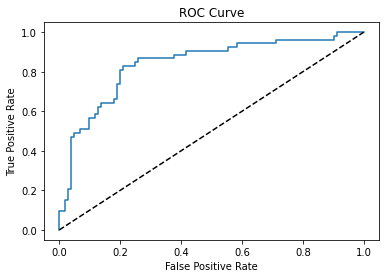

In [38]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The area under the curve (AUC) to evaluate the performance of the model that produced the curve.

A large AUC indicates that the model is able to differentiate the respective classes with high accuracy, while a low AUC indicates that the model makes poor, often wrong predictions. A ROC curve that lies on the diagonal indicates that the model does no better than random.

We can say that the model is performing well. That is, it is making good predictions.

Question 10. What is the purpose of the activation function? Provide an example.

The purpose of an activation function is to add some kind of non-linear property to the function. Example: Linear Activation Function. It takes the inputs, multiplied by the weights for each neuron, and creates an output signal proportional to the input.

Question 11. What is binary cross-entropy and when is it used?

The binary crossentropy function is used on yes/no decisions. The loss tells you how wrong your model’s predictions are.
Example: You want to determine the mood of a piece of music. Every piece can have more than one mood, for instance, it can be both "Happy" and "Energetic" at the same time. To solve this problem you use binary crossentropy.

In [0]:
#model.save('Diabetes_Final')

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


==========================================================================

## Exercise 3. Natural Language Processing Applications (40 points)
Use the ‘train_comment_small_100.csv’ in Data Files folder.

Question 1. Open a new Jupyter notebook or Google Colab. Import numpy, pandas and matplotlib.pyplot.

Load the dataset into a data frame.

In [0]:
#reference: Deep Learning for Natural Language Processing By Karthiek Reddy Bokka, Shubhangi Hora, Tanuj Jain, Monicah Wambugu June 2019

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('train_comment_small_100.csv', sep=',')

In [43]:
dataset.head()

,comment_text,toxic
0,"""\n \n I'm sure if you worked on articles othe...",0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\n More\n I can't make any real suggestions o...",0
4,REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski,0


In [44]:
dataset.shape

(99, 2)

Question 2. Next step is to clean and prepare the data.

Import re and nltk.

From nltk.corpus import stopwords. From nltk.stem.porter, import PorterStemmer.

Create an array for your cleaned text to be stored in.

In [45]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
corpus = []

Question 3. Using a for loop, iterate through every instance (every review).

Replace all non-alphabets with a ' ' (whitespace). Convert all alphabets into lowercase.

Split each review into individual words. Initiate the PorterStemmer. If the word is not a stopword, perform stemming on the word.

Join all the individual words back together to form a cleaned review.

Append this cleaned review to the array you created.

In [0]:
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['comment_text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [48]:
corpus[:10]

['sure work articl arcayn fine two seem problem seek edit xenotalk',
 'aww match background colour seemingli stuck thank talk januari utc',
 'hey man realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info',
 'make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later one els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipedia good articl nomin transport',
 'redirect talk voydan pop georgiev chernodrinski',
 'mitsurugi point made sens argu includ hindi ryo sakazaki page includ inform',
 'mean bother see write someth regard remov anyth post oh well acctual discuss even better like ask take closer look prematur wrestl death catagori men list sure men belong togeth catagori anyth think catagori besid delt',
 'regard recent edit pleas read wp filmplot edit film articl edit s

In [49]:
len(corpus)

99

Question 4. Import CountVectorizer. Convert the reviews into word count vectors using CountVectorizer.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 20)

Question 5. Create an array to store each unique word as its own column, hence making them independent variables.

In [0]:
X = cv.fit_transform(corpus).toarray()

In [52]:
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

Question 6. Import LabelEncoder from sklearn.preprocessing.

Use the LabelEncoder on the target output (y).

In [0]:
from sklearn import preprocessing

In [0]:
y = dataset['toxic']

In [0]:
labelencoder_y = preprocessing.LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Question 7. Import train_test_split.

Divide the dataset into a training set and a validation set (80/20).

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Question 8. Import StandardScaler from sklearn.preprocessing.

Use the StandardScaler on the features of both the training set and the validation set (X).

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Question 9. Now the next task is to create the neural network.

Import keras.

Import Sequential from keras.models and Dense from Keras layers.

In [0]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

Question 10. Initialize the neural network.

Add the first hidden layer with 'relu' as the activation function.

Repeat step for the second hidden layer.

Add the output layer with 'softmax' as the activation function.

Compile the neural network, using 'adam' as the optimizer, 'binary_crossentropy' as the loss function and 'accuracy' as the performance metric.

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 20))
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________


Question 11. Train the model. Fit the neural network on the training dataset with a batch_size of 3 and a nb_epoch of 200.

What is the outcome?

In [64]:
classifier.fit(X_train, y_train, batch_size = 3, nb_epoch = 200)

Epoch 1/200
79/79 [==============================] - 0s 2ms/step - loss: 13.3923 - accuracy: 0.1266
Epoch 2/200
79/79 [==============================] - 0s 523us/step - loss: 13.3923 - accuracy: 0.1266
Epoch 3/200
79/79 [==============================] - 0s 475us/step - loss: 13.3923 - accuracy: 0.1266
Epoch 4/200
79/79 [==============================] - 0s 490us/step - loss: 13.3923 - accuracy: 0.1266
Epoch 5/200
79/79 [==============================] - 0s 462us/step - loss: 13.3923 - accuracy: 0.1266
Epoch 6/200
79/79 [==============================] - 0s 460us/step - loss: 13.3923 - accuracy: 0.1266
Epoch 7/200
79/79 [==============================] - 0s 499us/step - loss: 13.3923 - accuracy: 0.1266
Epoch 8/200
79/79 [==============================] - 0s 504us/step - loss: 13.3923 - accuracy: 0.1266
Epoch 9/200
79/79 [==============================] - 0s 512us/step - loss: 13.3923 - accuracy: 0.1266
Epoch 10/200
79/79 [==============================] - 0s 803us/step - loss: 13.3923 

In [65]:
X_test[:,10]

array([-0.27498715, -0.27498715, -0.27498715, -0.27498715, -0.27498715,
       -0.27498715, -0.27498715, -0.27498715, -0.27498715, -0.27498715,
       -0.27498715, -0.27498715, -0.27498715, -0.27498715, -0.27498715,
       -0.27498715, -0.27498715, -0.27498715, -0.27498715, -0.27498715])

The model got trained with a loss value of 13.3923 accuracy as 0.1266. 
The lower the loss, the better a model. Loss is a summation of the errors made for each example in training sets. It is not percentage unlike accuracy .

Question 12. Validate the model.

Evaluate the neural network and print the accuracy scores to see how it performed.

What is your conclusion?

In [66]:
y_pred = classifier.predict(X_test)

scores = classifier.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = classifier.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

79/79 [==============================] - 0s 257us/step
Training Accuracy: 12.66%

20/20 [==============================] - 0s 147us/step
Testing Accuracy: 0.00%



In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      20.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00      20.0
   macro avg       0.00      0.00      0.00      20.0
weighted avg       0.00      0.00      0.00      20.0



The model is not efficient as the accuracy is not good. One of the reasons could be lack of good data for training the network.

Question 13. Print the confusion matrix by importing confusion_matrix from sklearn.metrics.

What does the confusion matrix tell you?

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [69]:
cm = confusion_matrix(y_test, y_pred)
scores

[15.249238967895508, 0.0]

In [70]:
cm

array([[ 0, 20],
       [ 0,  0]])

Text(33.0, 0.5, 'Actual')

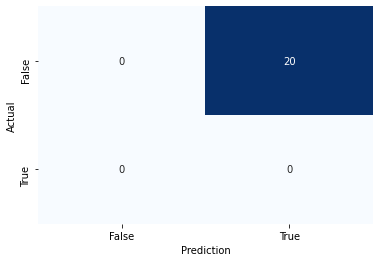

In [71]:
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=['False','True'],
                 yticklabels=['False','True'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

There is a high rate of false rate in the confusion matrix.

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.The confusion matrix shows the ways in which our classification model is confused when it makes predictions.

From the above confusion matrix we can see that our model's efficiency is very low. The False Negative rate is high which says, the model predicted the false values as true.